In [60]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
import kagglehub
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree


In [61]:
df = pd.read_csv('Housing.csv')
df.columns
df




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [62]:
x = df.drop(['id','date', 'zipcode', 'waterfront','view','price'], axis=1 )
y = df.price

In [63]:
df.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7229300521  20141013T000000  231300.0         2       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [64]:
model = DecisionTreeRegressor(max_depth=10)


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=5000)

In [66]:
model.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=10)

In [67]:
y_pred = model.predict(x_test)

In [68]:
accuracy = model.score(x_test, y_test)
accuracy

0.7409273632494993

In [69]:
from sklearn import tree

[Text(0.5794336100668338, 0.9545454545454546, 'x[6] <= 8.5\nsquared_error = 137332765373.086\nsamples = 17290\nvalue = 542418.81'),
 Text(0.3164486737677527, 0.8636363636363636, 'x[11] <= 47.535\nsquared_error = 39281851334.359\nsamples = 13860\nvalue = 438582.51'),
 Text(0.4479411419172933, 0.9090909090909092, 'True  '),
 Text(0.15903038847117795, 0.7727272727272727, 'x[2] <= 2019.5\nsquared_error = 14030008782.17\nsamples = 5803\nvalue = 314897.004'),
 Text(0.07649331662489557, 0.6818181818181818, 'x[2] <= 1529.0\nsquared_error = 7145329422.029\nsamples = 3886\nvalue = 273282.47'),
 Text(0.03508771929824561, 0.5909090909090909, 'x[12] <= -122.377\nsquared_error = 5931012696.868\nsamples = 2160\nvalue = 246470.262'),
 Text(0.014411027568922305, 0.5, 'x[11] <= 47.34\nsquared_error = 11576410858.165\nsamples = 107\nvalue = 352147.243'),
 Text(0.005847953216374269, 0.4090909090909091, 'x[1] <= 1.25\nsquared_error = 1031693094.136\nsamples = 18\nvalue = 227319.444'),
 Text(0.0050125313283

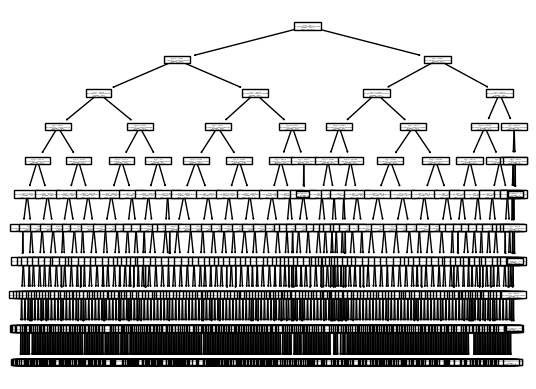

In [70]:
tree.plot_tree(model)